<a href="https://colab.research.google.com/github/withlionbuddha/learning.ai/blob/ground/%EC%8B%9C%EA%B3%84%EC%97%B4_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%97%90%EC%84%9C_%EC%83%81%EA%B4%80%EA%B4%80%EA%B3%84%EB%A5%BC_%EA%B0%96%EB%8A%94_%EB%B3%80%EC%88%98%EB%A5%BC_%EC%B6%94%EC%B6%9C%ED%95%98%EB%8A%94_%EA%B3%BC%EC%A0%95_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# 예시: CSV 파일에서 시계열 데이터 로드
df = pd.read_csv('./time_series_data.csv', parse_dates=['Date'], index_col='Date')
print(df.head())

            Variable_A  Variable_B  Variable_C
Date                                          
2023-01-01          50          22          32
2023-01-02          12          24          34
2023-01-03          14          23          35
2023-01-04          13          26          33
2023-01-05          15          27          36


In [ ]:
df['Variable_A']

,Variable_A
Date,
2023-01-01,50
2023-01-02,12
2023-01-03,14
2023-01-04,13
2023-01-05,15
2023-01-06,17
2023-01-07,19
2023-01-08,18
2023-01-09,16


In [ ]:
# 결측치 확인 및 제거
print(df.isnull().sum())
df = df.dropna()

# 필요에 따라 차분을 통해 비정상성 제거
df_diff = df.diff().dropna()


Variable_A    0
Variable_B    0
Variable_C    0
dtype: int64


In [ ]:
# 피어슨 상관계수 계산
pearson_corr = df_diff.corr(method='pearson')
print(pearson_corr)


            Variable_A  Variable_B  Variable_C
Variable_A    1.000000    0.055679   -0.141902
Variable_B    0.055679    1.000000    0.021038
Variable_C   -0.141902    0.021038    1.000000


In [ ]:
# 스피어만 상관계수 계산
spearman_corr = df_diff.corr(method='spearman')
print(spearman_corr)


            Variable_A  Variable_B  Variable_C
Variable_A    1.000000    0.365723    0.120333
Variable_B    0.365723    1.000000    0.138813
Variable_C    0.120333    0.138813    1.000000


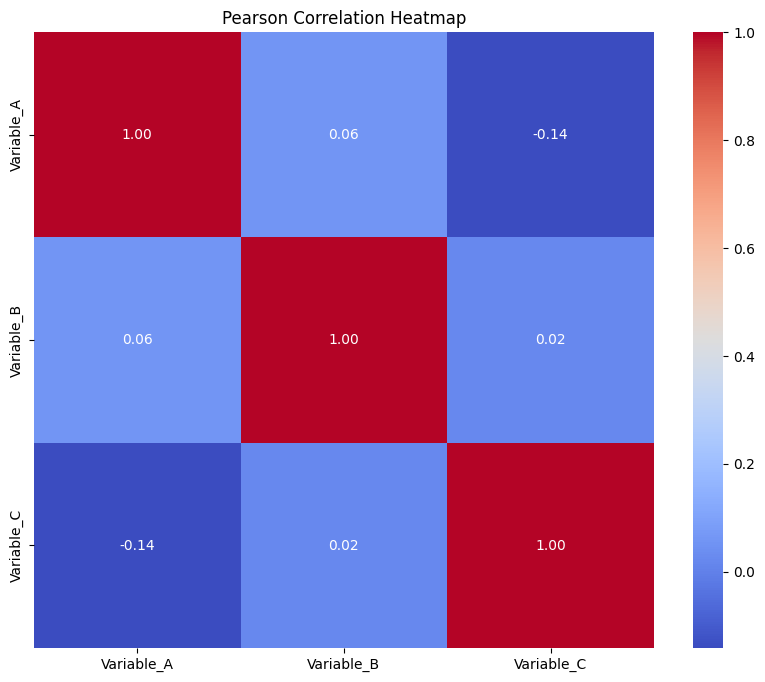

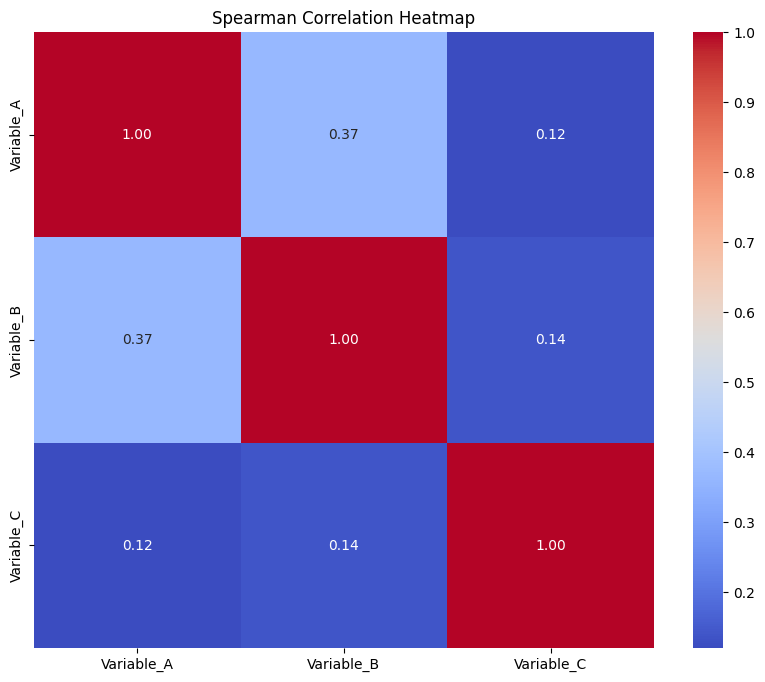

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 피어슨 상관관계 히트맵
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Heatmap')
plt.show()

# 스피어만 상관관계 히트맵
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation Heatmap')
plt.show()


<ipython-input-56-1f0dc4e143ec>:10: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(range(len(cross_corr)), cross_corr, use_line_collection=True)


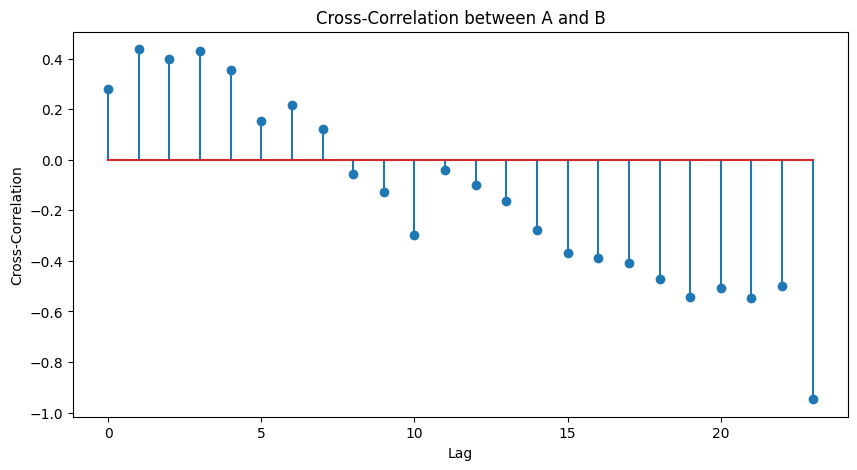

In [ ]:
from statsmodels.tsa.stattools import ccf

# 예시: 변수 A와 변수 B의 교차상관 분석
variable_a = df['Variable_A']
variable_b = df['Variable_B']

cross_corr = ccf(variable_a, variable_b)[:40]  # 첫 40개의 지연(lag) 값

plt.figure(figsize=(10, 5))
plt.stem(range(len(cross_corr)), cross_corr, use_line_collection=True)
plt.xlabel('Lag')
plt.ylabel('Cross-Correlation')
plt.title('Cross-Correlation between A and B')
plt.show()


In [ ]:
# 상관계수 임계값 설정 (예: |r| > 0.7)
threshold = 0.7
high_corr_vars = pearson_corr[abs(pearson_corr) > threshold].index.tolist()
high_corr_vars.remove('Variable_A')  # 자기 자신 제거

print("상관관계가 높은 변수들:", high_corr_vars)


상관관계가 높은 변수들: ['Variable_B', 'Variable_C']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 예시: 변수 A를 타겟으로, 상관관계가 높은 변수들을 피처로 사용
X = df[high_corr_vars]
y = df['Variable_A']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
print(f"평균 제곱 오차(MSE): {mse}")


평균 제곱 오차(MSE): 2.3420802933458402


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 계산
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


      feature        VIF
0  Variable_B  89.387929
1  Variable_C  89.387929


In [ ]:
df['Variable_A']

,Variable_A
Date,
2023-01-01,50
2023-01-02,12
2023-01-03,14
2023-01-04,13
2023-01-05,15
2023-01-06,17
2023-01-07,19
2023-01-08,18
2023-01-09,16


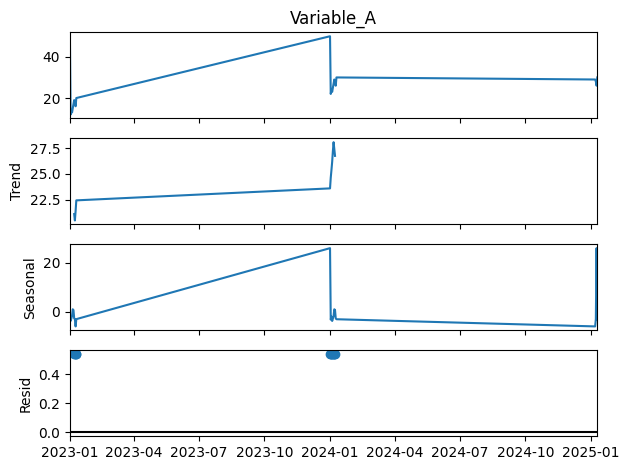

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# 시계열 분해 (예: 변수 A)
decomposition = seasonal_decompose(df['Variable_A'], model='additive', period=12)
decomposition.plot()
plt.show()
